### 2024/09/03 00:55
2からバックポートして，2のコードでsbertを実行する

In [12]:
import importlib
from logging import config  
import logging              
from hydra import compose, initialize               
from omegaconf import DictConfig, OmegaConf         
from cache.cache import Cache  
from dataclasses import dataclass
from reduce_vectors_test import mode_list, ReduceVectors
import polars as pl
from multi_vector_representation import MultiVectorRepresentation

from PersistenceDiagramWrapper import PersistenceDiagramWrapper

import multi_vector_representation
import reduce_vectors_test
importlib.reload(multi_vector_representation)
importlib.reload(reduce_vectors_test)
config.fileConfig("logging.conf", disable_existing_loggers = False)

logger = logging.getLogger(__name__)
progress = logging.getLogger("progress")

#lang_model = "qwen2"
lang_model = "sentence-transformers"
#lang_model = "mistral"
with initialize(version_base=None, config_path="conf", job_name="jupyter"):
    cfg = compose(config_name="config.yaml", 
                  overrides=[f"io={lang_model}", "execute.max_num_inputs=20"],
                  return_hydra_config=True)

mode = mode_list[0]
study_name = f"{mode.name}-{lang_model}-{cfg.execute.debug.num_inputs}"   
cache = Cache(cfg,
              f"ReduceVectors-{study_name}",
              reset = cfg.cache.reset
              )
filename = cfg.io.input_filename
progress.info(f"input filename = {filename}. Loading...")
vecs = pl.read_parquet(filename)
progress.info(f"prepared vectors={vecs.shape}")
start_index = cfg.execute.debug.start_index       
progress.info(f"start_index={start_index}")
max_num_inputs = cfg.execute.max_num_inputs        
progress.info(f"max_num_inputs={max_num_inputs}")
vec = vecs[start_index:start_index + max_num_inputs]  
progress.info(f"target vectors={vec.shape}")  
vec

2024-09-03 01:08:58,290] MainProcess(1482003).MainThread(139852985743168) 1713546473.<module>(38) INFO -> input filename = model_outputs/sentence-transformers/embedding-data.parquet. Loading...


/home/tetsu_sato/llmEmbeddingAnalysis-3rd/.venv/lib/python3.12/site-packages/hydra/_internal/defaults_list.py:251: UserWarning:

In 'config.yaml': Defaults list is missing `_self_`. See https://hydra.cc/docs/1.2/upgrades/1.0_to_1.1/default_composition_order for more information



2024-09-03 01:08:58,503] MainProcess(1482003).MainThread(139852985743168) 1713546473.<module>(40) INFO -> prepared vectors=(5749, 5)
2024-09-03 01:08:58,505] MainProcess(1482003).MainThread(139852985743168) 1713546473.<module>(42) INFO -> start_index=0
2024-09-03 01:08:58,507] MainProcess(1482003).MainThread(139852985743168) 1713546473.<module>(44) INFO -> max_num_inputs=20
2024-09-03 01:08:58,508] MainProcess(1482003).MainThread(139852985743168) 1713546473.<module>(46) INFO -> target vectors=(20, 5)


sentence1,embedding1,sentence2,embedding2,label
str,"array[f64, 384]",str,"array[f64, 384]",f64
"""A plane is taking off.""","[0.065392, 0.02813, … 0.032704]","""An air plane is taking off.""","[0.037159, 0.014117, … 0.063264]",5.0
"""A man is playing a large flute…","[0.081221, -0.02136, … 0.064187]","""A man is playing a flute.""","[0.043285, -0.041842, … 0.04312]",3.8
"""A man is spreading shreded che…","[0.017162, 0.024835, … -0.002522]","""A man is spreading shredded ch…","[-0.038157, -0.033265, … -0.018642]",3.8
"""Three men are playing chess.""","[0.047791, -0.053223, … -0.017164]","""Two men are playing chess.""","[0.039619, -0.00094, … -0.031325]",2.6
"""A man is playing the cello.""","[0.018254, 0.015903, … 0.040673]","""A man seated is playing the ce…","[0.020997, -0.002901, … 0.05276]",4.25
…,…,…,…,…
"""A dog is trying to get bacon o…","[0.005957, 0.015668, … 0.02326]","""A dog is trying to eat the bac…","[0.001151, -0.007318, … 0.012961]",3.75
"""The polar bear is sliding on t…","[-0.043021, -0.004103, … -0.018067]","""A polar bear is sliding across…","[-0.031592, -0.025086, … 0.004932]",5.0
"""A woman is writing.""","[0.001059, -0.050297, … -0.034676]","""A woman is swimming.""","[-0.017775, -0.0334, … 0.043684]",0.5


In [8]:
print(OmegaConf.to_yaml(cfg))

hydra:
  run:
    dir: /home/tetsu_sato/llmEmbeddingAnalysis-3rd/outputs/tese
  sweep:
    dir: multirun/${now:%Y-%m-%d}/${now:%H-%M-%S}
    subdir: ${hydra.job.num}
  launcher:
    _target_: hydra._internal.core_plugins.basic_launcher.BasicLauncher
  sweeper:
    _target_: hydra._internal.core_plugins.basic_sweeper.BasicSweeper
    max_batch_size: null
    params: null
  help:
    app_name: ${hydra.job.name}
    header: '${hydra.help.app_name} is powered by Hydra.

      '
    footer: 'Powered by Hydra (https://hydra.cc)

      Use --hydra-help to view Hydra specific help

      '
    template: '${hydra.help.header}

      == Configuration groups ==

      Compose your configuration from those groups (group=option)


      $APP_CONFIG_GROUPS


      == Config ==

      Override anything in the config (foo.bar=value)


      $CONFIG


      ${hydra.help.footer}

      '
  hydra_help:
    template: 'Hydra (${hydra.runtime.version})

      See https://hydra.cc for more info.


      == F

In [13]:
print(f"input vec={vec}")
time_delay=9
stride=6
reduce_func = "reduce_vector_takensembedding"
embedding_dimension = cfg.io.embedding_vector_dimension
rv = ReduceVectors(cfg,
                   time_delay=time_delay,
                   stride=stride,
                   cache=cache
                   )
mvr = MultiVectorRepresentation(embedding_dim=embedding_dimension,
                                    n=embedding_dimension - 3, # 適当
                                    dimension=3)
rv.set_reduce_func(getattr(mvr, reduce_func))

vec1 = vec.select("embedding1")
vec2 = vec.select("embedding2")

num_rows = vecs.select(pl.len()).item()
labels = vecs.select("label").to_numpy().reshape(num_rows)
import numpy as np
labels = np.concatenate([labels, labels])
logger.debug(f"labels to input embedding vectors={labels.shape}")
# 高次元ベクトルを多数の低次元ベクトルに変換
vecs = vec1.rename({"embedding1": "embedding"}).vstack(
      vec2.rename({"embedding2": "embedding"}))
progress.info(f"vec: vec1+vec2={vecs.shape}")
reduced_vec = rv.reduce_func(vecs,
                                time_delay=time_delay,
                                stride=stride,
                                )
progress.info(f"reduced vec={reduced_vec.shape}")

input vec=shape: (20, 5)
┌──────────────────────┬──────────────────────┬──────────────────────┬─────────────────────┬───────┐
│ sentence1            ┆ embedding1           ┆ sentence2            ┆ embedding2          ┆ label │
│ ---                  ┆ ---                  ┆ ---                  ┆ ---                 ┆ ---   │
│ str                  ┆ array[f64, 384]      ┆ str                  ┆ array[f64, 384]     ┆ f64   │
╞══════════════════════╪══════════════════════╪══════════════════════╪═════════════════════╪═══════╡
│ A plane is taking    ┆ [0.065392, 0.02813,  ┆ An air plane is      ┆ [0.037159,          ┆ 5.0   │
│ off.                 ┆ … 0.032704…          ┆ taking off.          ┆ 0.014117, …         ┆       │
│                      ┆                      ┆                      ┆ 0.06326…            ┆       │
│ A man is playing a   ┆ [0.081221, -0.02136, ┆ A man is playing a   ┆ [0.043285,          ┆ 3.8   │
│ large flute…         ┆ … 0.06418…           ┆ flute.            

In [14]:
def get_pd(fvecs, n=20):
    progress.info(f"fvecs={fvecs.shape}")
    dth = cfg.hyper_parameter.tda.dth
    import homcloud.interface as hc
    pdlist = hc.PDList.from_alpha_filtration(fvecs, save_to=None,
                                      save_boundary_map=True)
    print(f"pdlist={pdlist}")
    pd = pdlist.dth_diagram(dth)
    import numpy as np
    
    birth_death = np.array(pd.birth_death_times()).T
    print(f"birth death={birth_death.shape}")
    # y-xの大きさでソート
    sorted_data = birth_death[np.argsort(birth_death[:, 1] - birth_death[:, 0])[::-1]]
    # 大きい方から上位n個の要素を取得
    birth_death = sorted_data[:n]
    #logger.info(f"sorted pd=\n{pd}")
    # xでソート
    birth_death = birth_death[np.argsort(birth_death[:, 0])]
    return birth_death

num_inputs = cfg.execute.debug.num_inputs
index = 7
fvec1 = reduced_vec[index]
pd1 = get_pd(fvec1, n=10)
sentence1 = vec["embedding1"][index]
index = 7 + num_inputs
fvec2 = reduced_vec[index]
pd2 = get_pd(fvec2, n=10)
sentence2 = vec["embedding2"][index]


2024-09-03 01:09:09,130] MainProcess(1482003).MainThread(139852985743168) 2459079984.get_pd(2) INFO -> fvecs=(61, 3)
pdlist=PDList(path=None)
birth death=(119, 2)
2024-09-03 01:09:09,140] MainProcess(1482003).MainThread(139852985743168) 2459079984.get_pd(2) INFO -> fvecs=(61, 3)
pdlist=PDList(path=None)
birth death=(110, 2)


In [41]:
def plotPD(pd1,
           pd2,
           sentence1,
           sentence2,
           label,
           dis,
           index
          ):
    import numpy as np
    import textwrap
    import matplotlib.pyplot as plt    
    #print(f"pd in plotPD={pd1}")
    # 座標の範囲を調べる
    x_min = np.min([pd1[:, 0], pd2[:, 0]])
    x_max = np.max([pd1[:, 0], pd2[:, 0]])
    y_min = np.min([pd1[:, 1], pd2[:, 1]])
    y_max = np.max([pd1[:, 1], pd2[:, 1]])    
    
    fig = plt.figure(figsize=(8, 4))
    fig.subplots_adjust(hspace=0.6, wspace=0.4)
    fig.suptitle(f"label={label:.2f}(index={index}), dis={dis:.2f}", y=1.1)
    ax = fig.add_subplot(1, 2, 1)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title(textwrap.fill(f"pd1({sentence1})", 25))
    x=pd1[:, 0]
    y=pd1[:, 1]
    ax.scatter(x=x, y=y)

    # y=xの対角線を追加
    min_val = min(min(x), min(y))  # xとyの最小値を取得
    max_val = max(max(x), max(y))  # xとyの最大値を取得
    ax.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2)
    
    # 軸の範囲を調整（対角線が完全に表示されるように）
    #ax.set_xlim(min_val - 1, max_val + 1)
    #ax.set_ylim(min_val - 1, max_val + 1)


    ax = fig.add_subplot(1, 2, 2)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title(textwrap.fill(f"pd2({sentence2})", 25))
    x=pd2[:, 0]
    y=pd2[:, 1]
    ax.scatter(x=x, y=y)
    # y=xの対角線を追加
    min_val = min(min(x), min(y))  # xとyの最小値を取得
    max_val = max(max(x), max(y))  # xとyの最大値を取得
    ax.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2)
    
    # 軸の範囲を調整（対角線が完全に表示されるように）
    #ax.set_xlim(min_val - 1, max_val + 1)
    #ax.set_ylim(min_val - 1, max_val + 1)

    fig.show()
# Plotting 3-D Point Clouds
def plotPC(fvec1,
           fvec2,
           sentence1,
           sentence2,
           label,
           index):
    import plotly.express as px
    import textwrap
    
    fig1 = px.scatter_3d(fvec1, x=0, y=1, z=2,
                    
                       )
    fig1.update_layout(margin=dict(l=0, r=0, b=0, t=0))
    fig1.update_traces(marker_size=2)
    #fig.show()
    
    import plotly.express as px
    
    fig2 = px.scatter_3d(fvec2, x=0, y=1, z=2,
                    
                       )
    fig2.update_layout(margin=dict(l=0, r=0, b=0, t=0))
    fig2.update_traces(marker_size=2)
    #fig.show()
    from plotly.subplots import make_subplots
    # subplotを作成
    fig = make_subplots(
        rows=1, cols=2,
        specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}]],  # 各サブプロットのタイプを指定
        horizontal_spacing=0.02  # 横の間隔を狭くする
    )
    
    # 各サブプロットに図を追加
    for trace in fig1.data:
        fig.add_trace(trace, row=1, col=1)
    
    for trace in fig2.data:
        fig.add_trace(trace, row=1, col=2)
    # 全体のサイズを調整
    fig.update_layout(
        width=1100,  # 図の幅
        height=600   # 図の高さ
    )
    
    # 各図にタイトルを追加
    fig.update_layout(
        title=dict(
        text=f"label={label:.2f}(index={index})",  # 全体のタイトル
        x=0.5,  # 中央に配置
        y=0.95,  # 上部に配置
        font=dict(size=24)  # フォントサイズを大きく
    ),
        width=1100,
        height=700,
        annotations=[
            dict(text=textwrap.fill(f"{sentence1}", 40),
                 font=dict(size=18),
                 x=0.1, y=1.0, 
                 showarrow=False, xref="paper", yref="paper"),
            dict(text=f"{sentence2}", 
                 font=dict(size=18),
                 x=0.9, y=1.0, 
                 showarrow=False, xref="paper", yref="paper"),
        ]
    )
    # 図を表示
    fig.show()
        
#def generatePdFigure(fvec1, fvec2, pd1, pd2, sentence1, sentence2):
def generatePdFigure(index, n=20):
    num_inputs = cfg.execute.max_num_inputs
    index1 = index
    fvec1 = reduced_vec[index1]
    pd1 = get_pd(fvec1, n)
    sentence1 = vec["sentence1"][index1]
    label1 = vec["label"][index1]
    index2 = index + num_inputs
    print(f"index1={index1}, index2={index2}")
    fvec2 = reduced_vec[index2]
    pd2 = get_pd(fvec2, n)

    # vecは縦にスタックする前のオリジナルデータなのでindex1をそのまま使う
    sentence2 = vec["sentence2"][index1]
    label2 = vec["label"][index1]
    assert label1 == label2, f"label1({label1}) should equal to label2({label2})"
        
    plotPC(fvec1, fvec2, sentence1, sentence2, label1, index)
     
    pdw = PersistenceDiagramWrapper(cfg)  
    pdobj1 = pdw.createPdObject(pd1)  
    pdobj2 = pdw.createPdObject(pd2)  
    import homcloud.interface as hc
    dis = hc.distance.wasserstein(pdobj1, pdobj2)*1000   
    
    plotPD(pd1, pd2, sentence1, sentence2, label1, dis,index)

2024-09-03 01:11:04,758] MainProcess(1482003).MainThread(139852985743168) 2459079984.get_pd(2) INFO -> fvecs=(61, 3)
pdlist=PDList(path=None)
birth death=(112, 2)
index1=1, index2=21
2024-09-03 01:11:04,768] MainProcess(1482003).MainThread(139852985743168) 2459079984.get_pd(2) INFO -> fvecs=(61, 3)
pdlist=PDList(path=None)
birth death=(116, 2)


pd in plotPD=[[0.00044555 0.00061702]
 [0.00044604 0.00064797]
 [0.00045972 0.0007795 ]
 [0.00047454 0.0007787 ]
 [0.00047674 0.00077402]
 [0.00049941 0.00082618]
 [0.00062777 0.00120486]
 [0.00063131 0.00093463]
 [0.00063648 0.00077984]
 [0.00067494 0.00086136]
 [0.00077074 0.00092019]
 [0.00084411 0.00152396]
 [0.00084982 0.00110155]
 [0.00086845 0.00106377]
 [0.00088854 0.00104267]
 [0.00093127 0.00109599]
 [0.00102756 0.00124461]
 [0.00187455 0.00202002]
 [0.00237649 0.00252175]
 [0.00404821 0.00422624]]


/tmp/ipykernel_1482003/1255036340.py:31: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



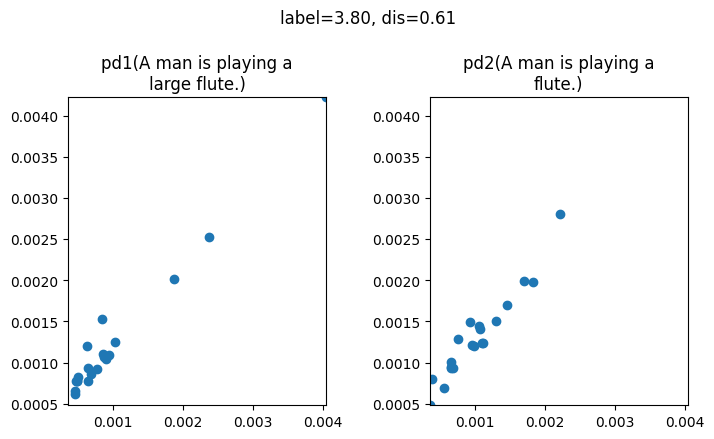

In [18]:
%matplotlib inline
generatePdFigure(1, 20)

2024-09-03 16:04:49,608] MainProcess(1482003).MainThread(139852985743168) 2459079984.get_pd(2) INFO -> fvecs=(61, 3)
pdlist=PDList(path=None)
birth death=(101, 2)
index1=0, index2=20
2024-09-03 16:04:49,620] MainProcess(1482003).MainThread(139852985743168) 2459079984.get_pd(2) INFO -> fvecs=(61, 3)
pdlist=PDList(path=None)
birth death=(100, 2)


/tmp/ipykernel_1482003/3944099178.py:56: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



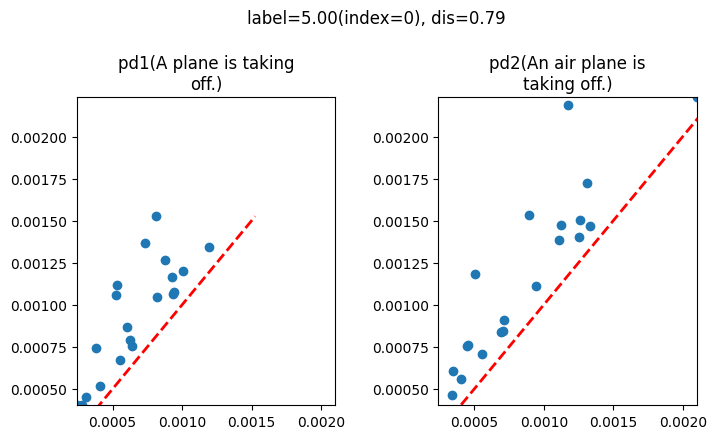

In [42]:
generatePdFigure(0, 20)

2024-09-03 23:19:27,235] MainProcess(1482003).MainThread(139852985743168) 2459079984.get_pd(2) INFO -> fvecs=(61, 3)
pdlist=PDList(path=None)
birth death=(103, 2)
index1=9, index2=29
2024-09-03 23:19:27,246] MainProcess(1482003).MainThread(139852985743168) 2459079984.get_pd(2) INFO -> fvecs=(61, 3)
pdlist=PDList(path=None)
birth death=(126, 2)


/tmp/ipykernel_1482003/3944099178.py:56: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



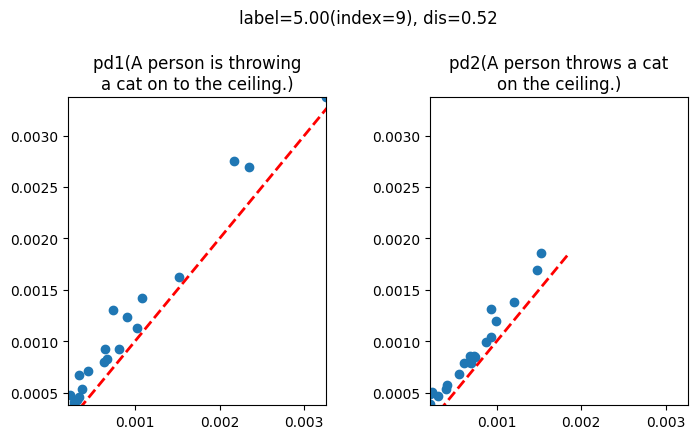

In [47]:
generatePdFigure(9, 20)

2024-09-03 16:05:48,082] MainProcess(1482003).MainThread(139852985743168) 2459079984.get_pd(2) INFO -> fvecs=(61, 3)
pdlist=PDList(path=None)
birth death=(108, 2)
index1=16, index2=36
2024-09-03 16:05:48,092] MainProcess(1482003).MainThread(139852985743168) 2459079984.get_pd(2) INFO -> fvecs=(61, 3)
pdlist=PDList(path=None)
birth death=(103, 2)


/tmp/ipykernel_1482003/3944099178.py:56: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



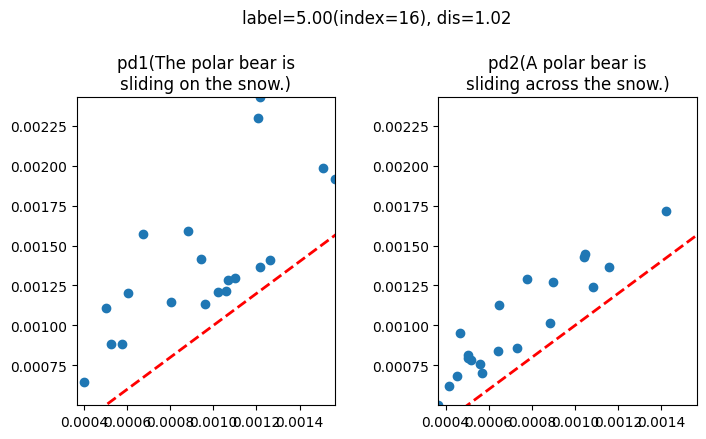

In [44]:
generatePdFigure(16, 20)

2024-09-03 16:07:44,188] MainProcess(1482003).MainThread(139852985743168) 2459079984.get_pd(2) INFO -> fvecs=(61, 3)
pdlist=PDList(path=None)
birth death=(104, 2)
index1=6, index2=26
2024-09-03 16:07:44,198] MainProcess(1482003).MainThread(139852985743168) 2459079984.get_pd(2) INFO -> fvecs=(61, 3)
pdlist=PDList(path=None)
birth death=(113, 2)


/tmp/ipykernel_1482003/3944099178.py:56: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



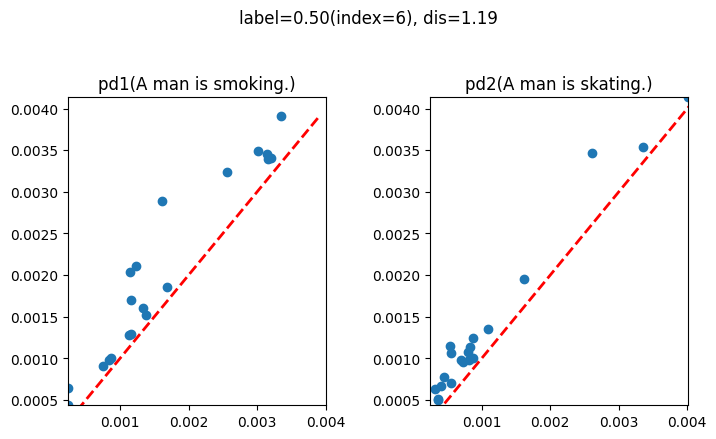

In [45]:
generatePdFigure(6, 20)

2024-09-03 16:08:35,841] MainProcess(1482003).MainThread(139852985743168) 2459079984.get_pd(2) INFO -> fvecs=(61, 3)
pdlist=PDList(path=None)
birth death=(119, 2)
index1=7, index2=27
2024-09-03 16:08:35,852] MainProcess(1482003).MainThread(139852985743168) 2459079984.get_pd(2) INFO -> fvecs=(61, 3)
pdlist=PDList(path=None)
birth death=(99, 2)


/tmp/ipykernel_1482003/3944099178.py:56: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



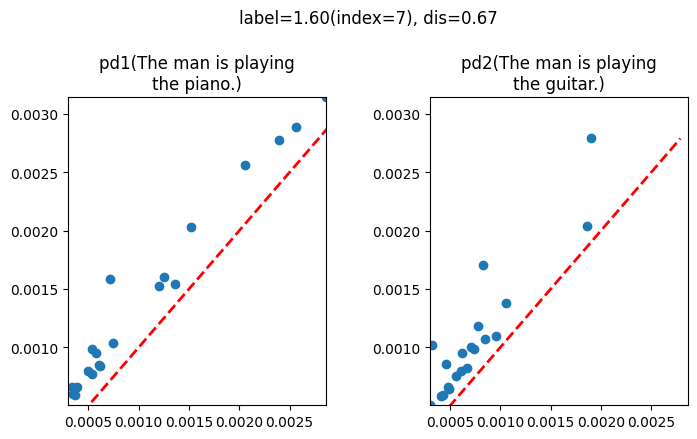

In [46]:
generatePdFigure(7, 20)